# LINEAR REGRESSION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('salary.csv')

In [2]:
df.head()

,Employee ID,YearsOfExperience,Salary
0,1001,5,10000
1,1002,3,8500
2,1003,6,12000
3,1004,2,8000
4,1005,3,8500


In [3]:
df.isnull().sum()

Employee ID          0
YearsOfExperience    0
Salary               0
dtype: int64

In [4]:
df.shape

(150, 3)

In [5]:
new_df = df[['YearsOfExperience', 'Salary']]
new_df

,YearsOfExperience,Salary
0,5,10000
1,3,8500
2,6,12000
3,2,8000
4,3,8500
...,...,...
145,8,8500
146,7,12000
147,8,8000
148,3,8500


Text(0.5, 1.0, 'YearsOfExperience VS Salary')

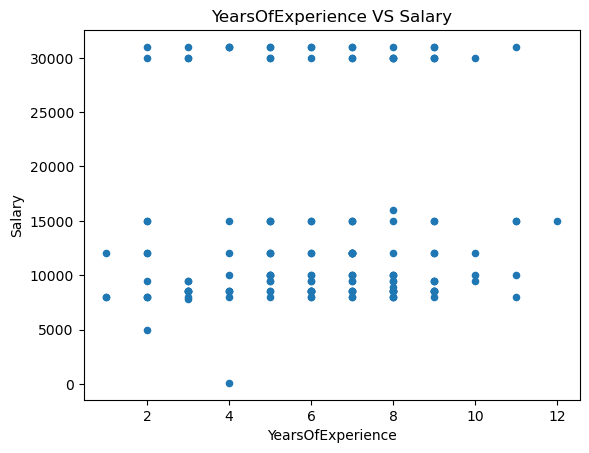

In [6]:
new_df.plot(x='YearsOfExperience', y='Salary', kind='scatter')
plt.title('YearsOfExperience VS Salary')

In [7]:
x = new_df['YearsOfExperience']
y = new_df['Salary']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
print("X_train: ",x_train.shape)
print("X_test: ",x_test.shape)
print("Y_train: ",y_train.shape)
print("Y_test: ",y_test.shape)

X_train:  (120,)
X_test:  (30,)
Y_train:  (120,)
Y_test:  (30,)


In [11]:
model = LinearRegression()

In [12]:
model.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [13]:
model.coef_

array([161.96687036])

In [14]:
model.intercept_

13406.592326168935

In [15]:
y_pred = model.predict(x_test.values.reshape(-1,1))

In [16]:
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  85080303.60391547


In [17]:
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  9223.898503556697


In [18]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  7625.4563150012655


In [19]:
r2 = r2_score(y_test, y_pred)
print("R2 --> ",r2)

R2 -->  0.010136148794658073


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Predicted')

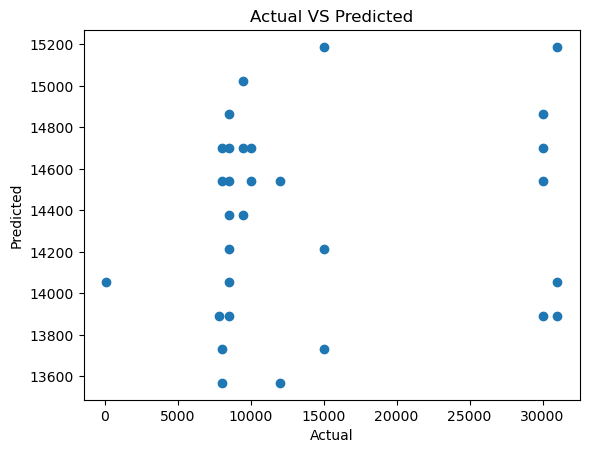

In [22]:
plt.scatter(y_test, y_pred)
plt.title('Actual VS Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

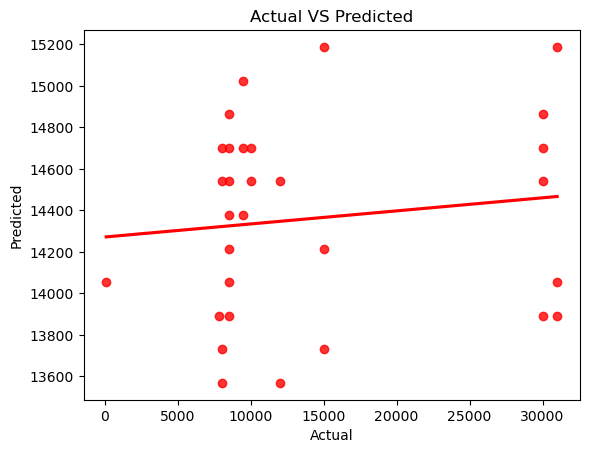

In [23]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.title('Actual VS Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# LOGISTIC REGRESSION 

In [24]:
import pandas as pd
from matplotlib import pyplot as plt

In [25]:
df = pd.read_csv('age.csv')

In [26]:
df.head()

,ClientAge,BoughtInsurance
0,22,0
1,21,0
2,25,0
3,36,0
4,40,1


In [27]:
df.isnull().sum()

ClientAge          0
BoughtInsurance    0
dtype: int64

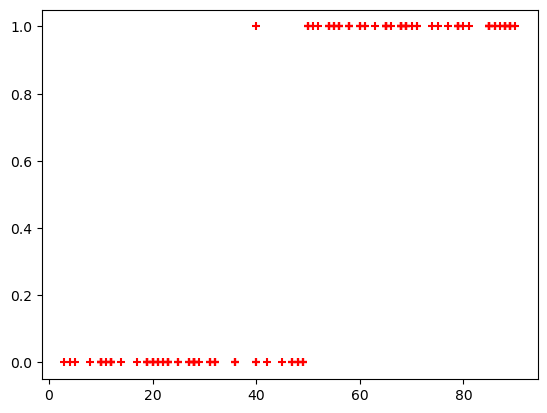

In [28]:
plt.scatter(df.ClientAge, df.BoughtInsurance, marker='+', color= 'red')

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df[['ClientAge']], df[['BoughtInsurance']], test_size= 0.5)

In [31]:
x_test

,ClientAge
1,21
0,22
171,55
180,68
116,69
...,...
108,65
94,14
161,68
110,85


In [32]:
x_train

,ClientAge
157,28
158,65
184,5
85,20
9,28
...,...
159,19
136,10
143,21
122,54


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()

In [35]:
model.fit(x_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [36]:
pred= model.predict(x_test)
print(pred)

[0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0
 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1]


In [37]:
model.score(x_test, y_test)

0.96

In [38]:
model.predict_proba(x_test)

array([[9.99991710e-01, 8.28982510e-06],
       [9.99987309e-01, 1.26910491e-05],
       [5.84590775e-02, 9.41540922e-01],
       [2.44626575e-04, 9.99755373e-01],
       [1.59803547e-04, 9.99840196e-01],
       [4.89247403e-08, 9.99999951e-01],
       [3.89756255e-02, 9.61024375e-01],
       [9.99954465e-01, 4.55350124e-05],
       [9.99103286e-01, 8.96714291e-04],
       [9.99980571e-01, 1.94289202e-05],
       [1.14666521e-07, 9.99999885e-01],
       [9.99999923e-01, 7.65692157e-08],
       [9.99836636e-01, 1.63364047e-04],
       [2.26002982e-06, 9.99997740e-01],
       [1.14666521e-07, 9.99999885e-01],
       [9.99999821e-01, 1.79457779e-07],
       [3.43028198e-01, 6.56971802e-01],
       [9.99414084e-01, 5.85915656e-04],
       [9.99994585e-01, 5.41492629e-06],
       [9.99994585e-01, 5.41492629e-06],
       [7.32905086e-03, 9.92670949e-01],
       [1.75545893e-07, 9.99999824e-01],
       [3.89756255e-02, 9.61024375e-01],
       [9.99414084e-01, 5.85915656e-04],
       [9.999998